===== THÔNG TIN CHUNG =====
Tổng số dòng: 1,840
Số cột: 14

Các cột: ['product_id', 'title', 'authors', 'original_price', 'current_price', 'quantity', 'category', 'n_review', 'avg_rating', 'pages', 'manufacturer', 'cover_link', 'summary', 'content']

--- 5 dòng đầu ---
   product_id                            title                    authors  \
0    74021317             Cây Cam Ngọt Của Tôi  José Mauro de Vasconcelos   
1    74021317             Cây Cam Ngọt Của Tôi  José Mauro de Vasconcelos   
2    74021317             Cây Cam Ngọt Của Tôi  José Mauro de Vasconcelos   
3    74021317             Cây Cam Ngọt Của Tôi  José Mauro de Vasconcelos   
4   184466860  Hành Tinh Của Một Kẻ Nghĩ Nhiều       Nguyễn Đoàn Minh Thư   

   original_price  current_price  quantity                    category  \
0          108000          64800   53075.0                 Tiểu Thuyết   
1          108000          64800   53075.0                 Tiểu Thuyết   
2          108000          64800   53075.0   

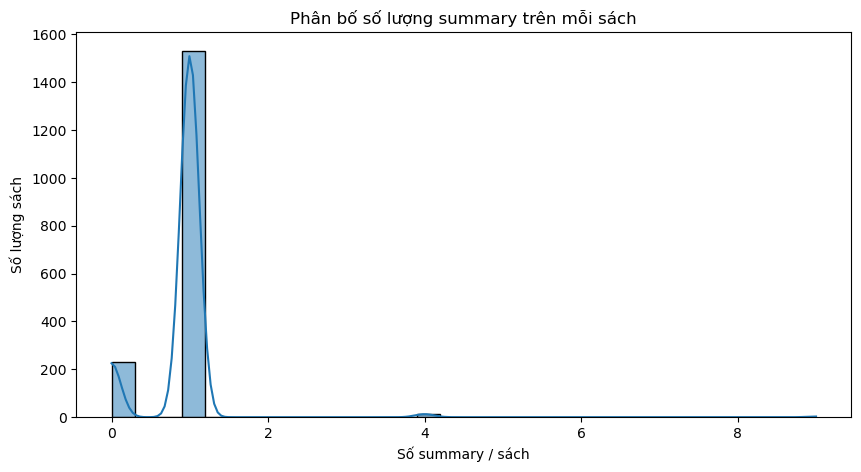


===== ĐỘ DÀI SUMMARY =====
count     1840.000000
mean      1721.228261
std       2006.987847
min          3.000000
25%        560.750000
50%       1306.000000
75%       2292.250000
max      29742.000000
Name: summary_length, dtype: float64


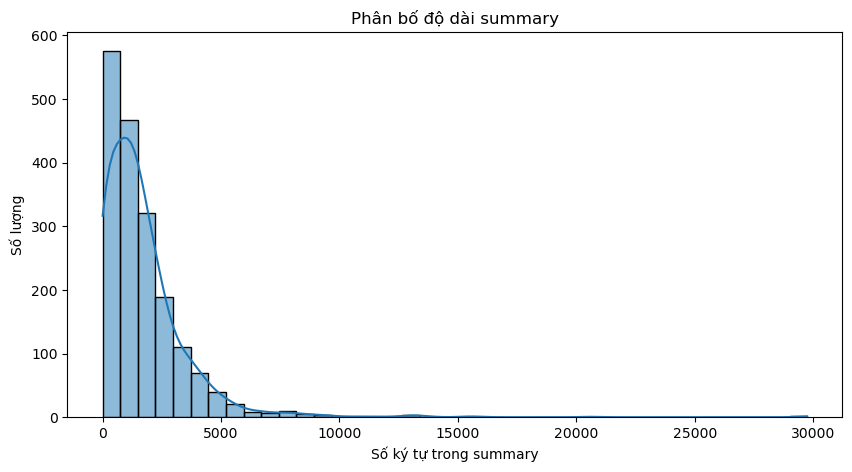


===== PHÂN TÍCH TEXT =====
Thống kê số lượng từ mỗi summary:
count    1840.000000
mean      372.622826
std       441.987678
min         1.000000
25%       114.750000
50%       280.000000
75%       491.250000
max      6670.000000
Name: word_count, dtype: float64


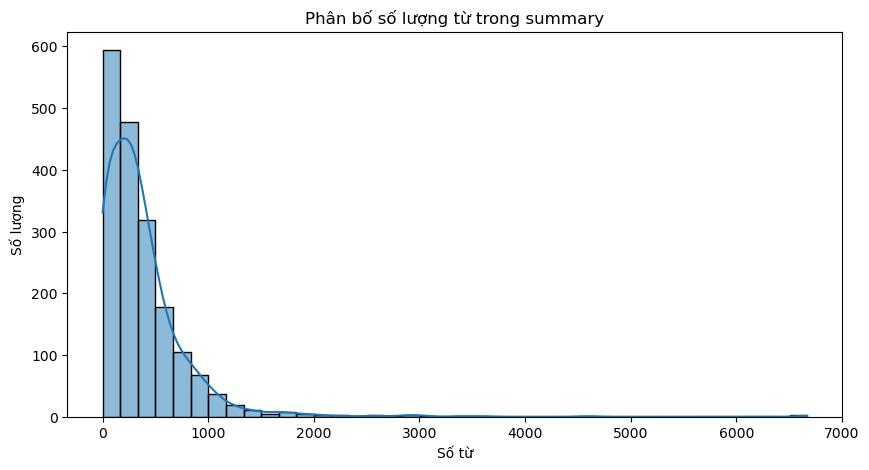


===== CÁC TRƯỜNG HỢP ĐẶC BIỆT =====
Summary ngắn nhất:
product_id                                                206308038
title             Lịch Nhã Nam - Những chú mèo văn chương -  Hap...
authors                                                    Tùng Nâm
original_price                                                88000
current_price                                                 64000
quantity                                                      112.0
category                                         Tác phẩm kinh điển
n_review                                                         19
avg_rating                                                      5.0
pages                                                            13
manufacturer                                  Nhà Xuất Bản Thế Giới
cover_link        https://salt.tikicdn.com/ts/product/a7/c0/d4/5...
summary                                                         NaN
content           Lịch đẹp lắm lắm luôn mụi ngừi. Đang dọn k

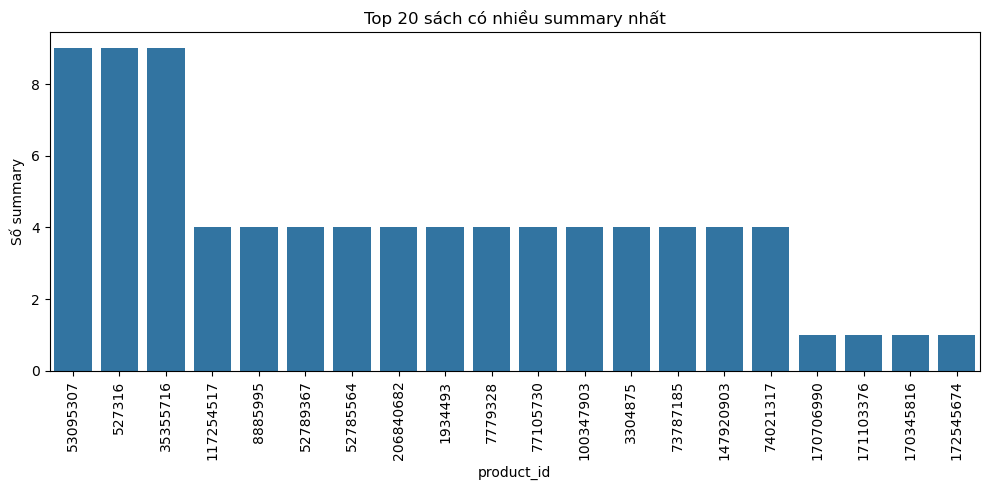


✅ Hoàn thành EDA.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Đọc dữ liệu sau khi merge
df = pd.read_csv("dataset/books_full_data.csv")

# === THÔNG TIN CƠ BẢN ===
print("===== THÔNG TIN CHUNG =====")
print(f"Tổng số dòng: {len(df):,}")
print(f"Số cột: {len(df.columns)}")
print("\nCác cột:", list(df.columns))

print("\n--- 5 dòng đầu ---")
print(df.head())

print("\n--- Kiểu dữ liệu ---")
print(df.dtypes)

print("\n--- Thống kê null ---")
print(df.isnull().sum())

# === PHÂN TÍCH THEO SÁCH ===
print("\n===== PHÂN TÍCH THEO SÁCH =====")
num_books = df["product_id"].nunique()
print(f"Số lượng sách duy nhất: {num_books:,}")

# Đếm số summary mỗi sách
summary_per_book = df.groupby("product_id")["summary"].count().sort_values(ascending=False)
print("\nTop 10 sách có nhiều summary nhất:")
print(summary_per_book.head(10))

plt.figure(figsize=(10, 5))
sns.histplot(summary_per_book, bins=30, kde=True)
plt.title("Phân bố số lượng summary trên mỗi sách")
plt.xlabel("Số summary / sách")
plt.ylabel("Số lượng sách")
plt.show()

# === PHÂN TÍCH ĐỘ DÀI NỘI DUNG ===
df["summary_length"] = df["summary"].astype(str).apply(len)
print("\n===== ĐỘ DÀI SUMMARY =====")
print(df["summary_length"].describe())

plt.figure(figsize=(10, 5))
sns.histplot(df["summary_length"], bins=40, kde=True)
plt.title("Phân bố độ dài summary")
plt.xlabel("Số ký tự trong summary")
plt.ylabel("Số lượng")
plt.show()

# === PHÂN TÍCH TEXT CƠ BẢN ===
print("\n===== PHÂN TÍCH TEXT =====")
df["word_count"] = df["summary"].astype(str).apply(lambda x: len(x.split()))
print("Thống kê số lượng từ mỗi summary:")
print(df["word_count"].describe())

plt.figure(figsize=(10, 5))
sns.histplot(df["word_count"], bins=40, kde=True)
plt.title("Phân bố số lượng từ trong summary")
plt.xlabel("Số từ")
plt.ylabel("Số lượng")
plt.show()

# === CÁC SÁCH ĐẶC BIỆT ===
print("\n===== CÁC TRƯỜNG HỢP ĐẶC BIỆT =====")
print("Summary ngắn nhất:")
print(df.loc[df["summary_length"].idxmin()])

print("\nSummary dài nhất:")
print(df.loc[df["summary_length"].idxmax()])

# === PHÂN BỐ THEO PRODUCT_ID ===
plt.figure(figsize=(10, 5))
top_books = summary_per_book.head(20)
sns.barplot(x=top_books.index.astype(str), y=top_books.values)
plt.title("Top 20 sách có nhiều summary nhất")
plt.xticks(rotation=90)
plt.xlabel("product_id")
plt.ylabel("Số summary")
plt.tight_layout()
plt.show()

print("\n✅ Hoàn thành EDA.")


In [4]:
import pandas as pd

# Đọc file
df = pd.read_csv("dataset/books_full_data.csv")

# Loại bỏ khoảng trắng đầu cuối (nếu có)
df["summary"] = df["summary"].astype(str).str.strip()
df["content"] = df["content"].astype(str).str.strip()

# Tạo cờ đánh dấu
has_summary = df["summary"].notna() & (df["summary"] != "") & (df["summary"].str.lower() != "nan")
has_comment = df["content"].notna() & (df["content"] != "") & (df["content"].str.lower() != "nan")

# Đếm thống kê
n_books = df["product_id"].nunique()
n_summary = df.loc[has_summary, "product_id"].nunique()
n_comment = df.loc[has_comment, "product_id"].nunique()
n_both = df.loc[has_summary & has_comment, "product_id"].nunique()

# In kết quả
print(f"📚 Tổng số sách: {n_books:,}")
print(f"📘 Sách có summary: {n_summary:,}")
print(f"💬 Sách có bình luận: {n_comment:,}")
print(f"📗 Sách có cả summary và bình luận: {n_both:,}")

# (Tuỳ chọn) Xem tỉ lệ %
print(f"\n📊 Tỷ lệ có summary: {n_summary/n_books:.1%}")
print(f"📊 Tỷ lệ có comment: {n_comment/n_books:.1%}")
print(f"📊 Tỷ lệ có cả hai: {n_both/n_books:.1%}")


📚 Tổng số sách: 1,777
📘 Sách có summary: 1,548
💬 Sách có bình luận: 1,677
📗 Sách có cả summary và bình luận: 1,458

📊 Tỷ lệ có summary: 87.1%
📊 Tỷ lệ có comment: 94.4%
📊 Tỷ lệ có cả hai: 82.0%
